# Examining weather trends for Brussels and the world
> Project submission by M Bosquet as part of Udacity Data Analyst Nanodegree

For this project local and global temperature data is analyzed and the temperature trends between Brussels and a selection of other cities (Berlin, Brussels, New York, Tokyo and Wellington) are compared. The goal is to create visualizations and a short write up describing the similarities and differences between global temperature trends and the selected cities. <br>
<br>
This short report, in form of a jupyter notebook, provides an overview of the steps taken to prepare the retrieved data to be visualized and observed, as outlined for the project.


## 1 Approach Outline

The following steps were taken to access and prepare the raw data from the database provided.

### 1.1. Tools used
- **SQL** to access data from the database provided and export as .csv files.
- **Excel** to combine global and individual city data, calculate moving averages and create line plots of temperature trends.
- **Python** for further analysis and visualizations (incl. warming stripes, correlation plotsand determination of correlation coefficient).

### 1.2. SQL Queries
Two queries were run in order to retrieve the raw data from the provided database. The first query was aimed at accessing the data from the global_data table, through the query:

 `SELECT *
     FROM global_dat`

With the second query the data from a selection of cities of interest were retrieved:

 `SELECT year, city, avg_temp
     FROM city_data`
 
 `WHERE city = 'Berlin' OR city = 'New York' OR city = 'Tokyo' OR 
       city = 'Brussels' OR city = 'Wellington'`

 `ORDER BY year`

## 2 Analysis

> *Missing - short intro*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
#Load in cleaned data
data = pd.read_csv('temp_data_clean.csv', index_col='year')
data.head()

,avg_temp_global,avg_temp_Berlin,avg_temp_NewYork,avg_temp_Tokyo,avg_temp_Wellington,avg_temp_Brussels
year,,,,,,
1759,8.030,8.595,8.567,NaN,NaN,9.545
1760,7.877,8.511,8.333,NaN,NaN,9.470
1761,7.956,8.483,8.272,NaN,NaN,9.426
1762,8.239,8.852,8.946,NaN,NaN,9.715
1763,8.150,8.842,8.717,NaN,NaN,9.653


The `data` DataFrame is used to create warming stripes, a common and informative way to visualize the change in temperature over time. The warming stripes were created through the `warmingstripes(location)` function detailed below.

In [4]:
# Extracting column headers
locations = data.columns.tolist()
locations

['avg_temp_global',
 'avg_temp_Berlin',
 'avg_temp_NewYork',
 'avg_temp_Tokyo',
 'avg_temp_Wellington',
 'avg_temp_Brussels']

In [5]:
def warmingstripes(location):
    temps = data[location]
    stacked_temps = np.stack((temps,temps))

    vmin = 5.9
    vmax = 11
    
    ## plotting
    plt.figure(figsize=(4,18))
    
    img = plt.imshow(stacked_temps, cmap='RdBu_r', aspect=40, )

    plt.gca().set_axis_off()
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0,
            hspace = 0, wspace = 0)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    
    plt.title('Warmingstripes for {}'.format(location[9:]))

    #save image   
    plt.savefig('stripes_' + location[9:] +'_2.png', bbox_inches = 'tight',
    pad_inches = 0, dpi=400)

The function above allows the creation on warming stripes to illustrate and emphasize the changes in temperature over time. The color of each stripe represents the temperature of a single year, ordered from the earliest available data at each location to now. More on warming stripes can be found here: [Show your stripes](https://www.climatecentral.org/showyourstripes).

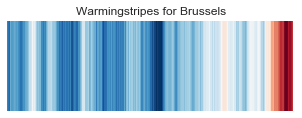

In [6]:
# Warmingstripes for Brussels
warmingstripes(locations[5])

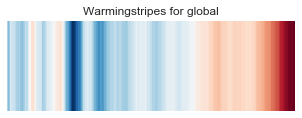

In [7]:
# Warmingstripes for global average
warmingstripes(locations[0])

Comparing the warming stripes for Brussels (first plot) with the global average (second plot), Brussels has only recently started to see stronger warming, whereas globally temperatures have started to warm more gradually.

### Correlation
> Missing - short intro

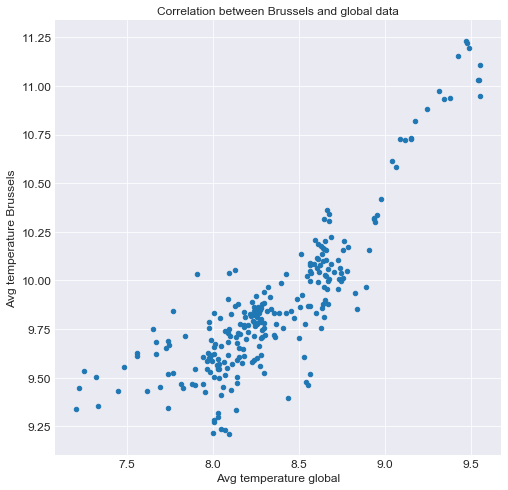

In [8]:
plot = data.plot(y='avg_temp_Brussels', x='avg_temp_global', title='Correlation between Brussels and global data', 
                 kind='scatter', figsize=(8,8), fontsize=12)
plt.ylabel('Avg temperature Brussels', fontsize=12)
plt.xlabel('Avg temperature global', fontsize=12)
plot;

## 3 Key Observations